# ECON 422 Problem Set 1

#### Korntawat Yodkhan, Yujing Sun, Jingyi Fu, Jiaqi Cheng, Xialei Gao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from linearmodels import IV2SLS

# Question 1 

The purpose of this paper is to examine the relationship between trade and economic growth. Specifically, the authors address the question of whether international trade causes economic growth or economic growth causes international trade.

A review of empirical research on the relationship between trade and growth is presented by the authors, which has produced mixed findings. In their view, the mixed results may be due to an inability to take for trade and growth endogeneity.

They propose an instrument for trade based on geographical variables in order to address this issue. There is an underlying assumption behind this approach that countries that are closer to each other are more likely to trade with one another, but it is unlikely that proximity directly affects the level of economic growth.

Based on this new approach, the authors conclude that international trade significantly influences economic growth in a positive and significant manner. As a result of an increase of 1% in the ratio of trade to GDP, real per capita income is estimated to increase by 0.5%.

A study of the channels through which trade influences growth is also conducted by the authors. It is found that trade has a positive effect on both physical and human capital accumulation and that these channels account for a significant portion of the overall effect of trade.

In summary, the study provides substantial evidence that international trade can contribute significantly to economic growth. Instrumental variables are employed by the authors in order to address an important econometric issue and provide a new and convincing argument for the positive relationship between trade and economic growth.


## Question 2

Using the CEPII Gravity dataset (link) and the CEPII GeoDist dataset (link) download the variables used by Frankel and Romer for Tables 1-4: bilateral trade flows (you can use the data by Comtrade), bilateral distance, geographical areas, indicators of whether a country is landlocked, country dummies, population, income, and its determinants. Pick a year before 2020 (the same from both datasets) and create a single dataset that contains all the variables. Each unit of observation should be a different origin-destination-year combination.

### Import data

In [2]:
df = pd.read_csv('gravity.csv')
df

/var/folders/50/7cl_zk114f168ksv_ymjwzm00000gn/T/ipykernel_48329/1161599087.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gravity.csv')


,year,country_id_o,country_id_d,iso3_o,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
0,2005,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952555,2015,ZWE,ZWE,ZWE,ZWE,716.0,716.0,1,1,2.0,...,91.0,91.0,101.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN
952556,2016,ZWE,ZWE,ZWE,ZWE,716.0,716.0,1,1,2.0,...,91.0,91.0,101.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN
952557,2017,ZWE,ZWE,ZWE,ZWE,716.0,716.0,1,1,2.0,...,61.0,61.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
952558,2018,ZWE,ZWE,ZWE,ZWE,716.0,716.0,1,1,2.0,...,32.0,32.0,41.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# We pick Year 2019
df_2019=df[df['year']==2019]
df_2019

,year,country_id_o,country_id_d,iso3_o,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
14,2019,ABW,ABW,ABW,ABW,533.0,533.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2019,ABW,AFG,ABW,AFG,533.0,4.0,1,1,-4.0,...,NaN,8.5,NaN,12.5,NaN,483.922,440.33899,440.33899,NaN,NaN
44,2019,ABW,AGO,ABW,AGO,533.0,24.0,1,1,-4.0,...,NaN,36.0,NaN,44.0,NaN,10.039,10.03900,10.03900,NaN,10.044
59,2019,ABW,AIA,ABW,AIA,533.0,660.0,1,1,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.088
74,2019,ABW,ALB,ABW,ALB,533.0,8.0,1,1,-4.0,...,NaN,4.5,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952499,2019,ZWE,YMD,ZWE,YMD,716.0,720.0,1,0,2.0,...,27.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952514,2019,ZWE,YUG,ZWE,YUG,716.0,890.0,1,0,2.0,...,27.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952529,2019,ZWE,ZAF,ZWE,ZAF,716.0,710.0,1,1,2.0,...,27.0,40.0,36.0,47.0,1692830.100,175992.580,940157.38000,656502.56000,2104516.000,184352.310
952544,2019,ZWE,ZMB,ZWE,ZMB,716.0,894.0,1,1,2.0,...,27.0,8.5,36.0,15.5,59552.535,61651.195,77331.59400,58542.07800,59552.559,61790.566


In [4]:
# check if there are duplicated combination of origin-destination countries
df_2019[df_2019.duplicated(subset=['iso3_o','iso3_d'], keep=False)].sort_values(by = 'country_id_o')

,year,country_id_o,country_id_d,iso3_o,iso3_d,iso3num_o,iso3num_d,country_exists_o,country_exists_d,gmt_offset_2020_o,...,entry_time_o,entry_time_d,entry_tp_o,entry_tp_d,tradeflow_comtrade_o,tradeflow_comtrade_d,tradeflow_baci,manuf_tradeflow_baci,tradeflow_imf_o,tradeflow_imf_d
104,2019,ABW,ANT.1,ABW,ANT,533.0,532.0,1,0,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3704,2019,ABW,YEM.2,ABW,YEM,533.0,887.0,1,1,-4.0,...,NaN,40.5,NaN,46.5,NaN,258.06299,256.181,255.627,NaN,258.07199
3689,2019,ABW,YEM.1,ABW,YEM,533.0,886.0,1,0,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3629,2019,ABW,VNM.2,ABW,VNM,533.0,704.0,1,1,-4.0,...,NaN,16.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
3614,2019,ABW,VNM.1,ABW,VNM,533.0,704.0,1,0,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948899,2019,ZWE,ANT.2,ZWE,ANT,716.0,530.0,1,0,2.0,...,27.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
948884,2019,ZWE,ANT.1,ZWE,ANT,716.0,532.0,1,0,2.0,...,27.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952469,2019,ZWE,YEM.1,ZWE,YEM,716.0,886.0,1,0,2.0,...,27.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950324,2019,ZWE,IDN.2,ZWE,IDN,716.0,360.0,1,1,2.0,...,27.0,12.6,36.0,23.6,44.015999,67639.24200,32531.605,13027.530,44.018002,67639.24200


In [5]:
# drop duplicates and select required variables
df_new = df_2019.drop_duplicates(subset=['iso3_o', 'iso3_d'])
df_selected = df_new[['year','country_id_o','country_id_d','iso3_o','iso3_d','tradeflow_comtrade_o','tradeflow_comtrade_d','gdp_o','gdp_d','distw_arithmetic','pop_o','pop_d','contig','gdpcap_o']]
df_selected

,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,pop_o,pop_d,contig,gdpcap_o
14,2019,ABW,ABW,ABW,ABW,NaN,NaN,3.310056e+06,3.310056e+06,32.0,106.310,106.3100,0.0,31.136
29,2019,ABW,AFG,ABW,AFG,NaN,483.922,3.310056e+06,1.879945e+07,13186.0,106.310,38041.7580,0.0,31.136
44,2019,ABW,AGO,ABW,AGO,NaN,10.039,3.310056e+06,6.930910e+07,9574.0,106.310,31825.2990,0.0,31.136
59,2019,ABW,AIA,ABW,AIA,NaN,NaN,3.310056e+06,NaN,978.0,106.310,NaN,0.0,31.136
74,2019,ABW,ALB,ABW,ALB,NaN,NaN,3.310056e+06,1.540183e+07,9090.0,106.310,2854.1909,0.0,31.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952499,2019,ZWE,YMD,ZWE,YMD,NaN,NaN,1.928429e+07,NaN,NaN,14645.473,NaN,NaN,1.317
952514,2019,ZWE,YUG,ZWE,YUG,NaN,NaN,1.928429e+07,NaN,NaN,14645.473,NaN,NaN,1.317
952529,2019,ZWE,ZAF,ZWE,ZAF,1692830.100,175992.580,1.928429e+07,3.879346e+08,1216.0,14645.473,58558.2660,1.0,1.317
952544,2019,ZWE,ZMB,ZWE,ZMB,59552.535,61651.195,1.928429e+07,2.330867e+07,511.0,14645.473,17861.0330,1.0,1.317


In [6]:
geo = pd.read_excel('geo_cepii.xls')
geo

,iso2,iso3,cnum,country,pays,area,dis_int,landlocked,continent,city_en,...,lang9_2,lang9_3,lang9_4,colonizer1,colonizer2,colonizer3,colonizer4,short_colonizer1,short_colonizer2,short_colonizer3
0,AW,ABW,533,Aruba,Aruba,193,5.225315,0,America,Oranjestad,...,.,.,.,NLD,.,.,.,.,.,.
1,AF,AFG,4,Afghanistan,Afghanistan,652225,303.761400,1,Asia,Kabul,...,Uzbek,.,.,.,.,.,.,GBR,.,.
2,AO,AGO,24,Angola,Angola,1246700,419.966600,0,Africa,Luanda,...,.,.,.,PRT,.,.,.,.,.,.
3,AI,AIA,660,Anguilla,Anguilla,102,3.798690,0,America,The Valley,...,.,.,.,GBR,.,.,.,.,.,.
4,AL,ALB,8,Albania,Albanie,28748,63.773110,0,Europe,Tirana,...,.,.,.,TUR,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,ZA,ZAF,711,South Africa,Afrique du Sud,1219912,415.430200,0,Africa,Pretoria,...,Shoto,.,.,GBR,NLD,.,.,.,.,.
234,ZA,ZAF,711,South Africa,Afrique du Sud,1219912,415.430200,0,Africa,Cape Town,...,Shoto,.,.,GBR,NLD,.,.,.,.,.
235,ZR,ZAR,180,Congo (Democratic Republic of the),"Congo, Rép. dém. du",2345410,576.027500,0,Africa,Kinshasa,...,Luba-Kasai,French,.,BEL,.,.,.,.,.,.
236,ZM,ZMB,894,Zambia,Zambie,752614,326.302200,1,Africa,Lusaka,...,Tonga,.,.,GBR,.,.,.,.,.,.


In [7]:
geo_o = geo[['iso3','area','landlocked','continent','dis_int']]
geo_o

,iso3,area,landlocked,continent,dis_int
0,ABW,193,0,America,5.225315
1,AFG,652225,1,Asia,303.761400
2,AGO,1246700,0,Africa,419.966600
3,AIA,102,0,America,3.798690
4,ALB,28748,0,Europe,63.773110
...,...,...,...,...,...
233,ZAF,1219912,0,Africa,415.430200
234,ZAF,1219912,0,Africa,415.430200
235,ZAR,2345410,0,Africa,576.027500
236,ZMB,752614,1,Africa,326.302200


In [8]:
geo_o = geo_o.rename(columns = {'iso3':'iso3_o','area':'area_o','landlocked':'landlocked_o',
                                'continent':'continent_o','dis_int':'dis_int_o'})
geo_o                    

,iso3_o,area_o,landlocked_o,continent_o,dis_int_o
0,ABW,193,0,America,5.225315
1,AFG,652225,1,Asia,303.761400
2,AGO,1246700,0,Africa,419.966600
3,AIA,102,0,America,3.798690
4,ALB,28748,0,Europe,63.773110
...,...,...,...,...,...
233,ZAF,1219912,0,Africa,415.430200
234,ZAF,1219912,0,Africa,415.430200
235,ZAR,2345410,0,Africa,576.027500
236,ZMB,752614,1,Africa,326.302200


In [9]:
geo_o.iso3_o.nunique()

225

In [10]:
# drop duplicates in geo_o
geo_o.drop_duplicates(inplace = True)
geo_o.reset_index(inplace = True)
geo_o.drop(columns = ['index'],inplace=True)
geo_o

,iso3_o,area_o,landlocked_o,continent_o,dis_int_o
0,ABW,193,0,America,5.225315
1,AFG,652225,1,Asia,303.761400
2,AGO,1246700,0,Africa,419.966600
3,AIA,102,0,America,3.798690
4,ALB,28748,0,Europe,63.773110
...,...,...,...,...,...
220,YUG,102173,0,Europe,120.227000
221,ZAF,1219912,0,Africa,415.430200
222,ZAR,2345410,0,Africa,576.027500
223,ZMB,752614,1,Africa,326.302200


In [11]:
geo_d = geo_o.rename(columns = {'iso3_o':'iso3_d','area_o':'area_d','landlocked_o':'landlocked_d',
                                'continent_o':'continent_d','dis_int_o':'dis_int_d'})
geo_d

,iso3_d,area_d,landlocked_d,continent_d,dis_int_d
0,ABW,193,0,America,5.225315
1,AFG,652225,1,Asia,303.761400
2,AGO,1246700,0,Africa,419.966600
3,AIA,102,0,America,3.798690
4,ALB,28748,0,Europe,63.773110
...,...,...,...,...,...
220,YUG,102173,0,Europe,120.227000
221,ZAF,1219912,0,Africa,415.430200
222,ZAR,2345410,0,Africa,576.027500
223,ZMB,752614,1,Africa,326.302200


In [12]:
df_merge = pd.merge(df_selected,geo_o,left_on = 'iso3_o', right_on ='iso3_o',how = 'inner')
df_merge

,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,pop_o,pop_d,contig,gdpcap_o,area_o,landlocked_o,continent_o,dis_int_o
0,2019,ABW,ABW,ABW,ABW,NaN,NaN,3.310056e+06,3.310056e+06,32.0,106.310,106.3100,0.0,31.136,193,0,America,5.225315
1,2019,ABW,AFG,ABW,AFG,NaN,483.922,3.310056e+06,1.879945e+07,13186.0,106.310,38041.7580,0.0,31.136,193,0,America,5.225315
2,2019,ABW,AGO,ABW,AGO,NaN,10.039,3.310056e+06,6.930910e+07,9574.0,106.310,31825.2990,0.0,31.136,193,0,America,5.225315
3,2019,ABW,AIA,ABW,AIA,NaN,NaN,3.310056e+06,NaN,978.0,106.310,NaN,0.0,31.136,193,0,America,5.225315
4,2019,ABW,ALB,ABW,ALB,NaN,NaN,3.310056e+06,1.540183e+07,9090.0,106.310,2854.1909,0.0,31.136,193,0,America,5.225315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53455,2019,ZWE,YMD,ZWE,YMD,NaN,NaN,1.928429e+07,NaN,NaN,14645.473,NaN,NaN,1.317,390759,1,Africa,235.119300
53456,2019,ZWE,YUG,ZWE,YUG,NaN,NaN,1.928429e+07,NaN,NaN,14645.473,NaN,NaN,1.317,390759,1,Africa,235.119300
53457,2019,ZWE,ZAF,ZWE,ZAF,1692830.100,175992.580,1.928429e+07,3.879346e+08,1216.0,14645.473,58558.2660,1.0,1.317,390759,1,Africa,235.119300
53458,2019,ZWE,ZMB,ZWE,ZMB,59552.535,61651.195,1.928429e+07,2.330867e+07,511.0,14645.473,17861.0330,1.0,1.317,390759,1,Africa,235.119300


In [13]:
df_final = pd.merge(df_merge,geo_d,left_on = 'iso3_d', right_on ='iso3_d',how = 'inner')
#drop NA
df_final = df_final.dropna(subset=['tradeflow_comtrade_o'])
df_final = df_final.reset_index(drop=True)
df_final

,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,...,contig,gdpcap_o,area_o,landlocked_o,continent_o,dis_int_o,area_d,landlocked_d,continent_d,dis_int_d
0,2019,ARE,ABW,ARE,ABW,1.049544e+04,NaN,4.172156e+08,3.310056e+06,12772.0,...,0.0,42.701000,83657,0,Asia,108.78900,193,0,America,5.225315
1,2019,ARG,ABW,ARG,ABW,4.954058e+03,NaN,4.528184e+08,3.310056e+06,5179.0,...,0.0,10.076000,2766889,0,America,625.64750,193,0,America,5.225315
2,2019,AUT,ABW,AUT,ABW,8.227330e+02,NaN,4.450119e+08,3.310056e+06,8716.0,...,0.0,50.113998,83858,1,Europe,108.91960,193,0,America,5.225315
3,2019,AZE,ABW,AZE,ABW,6.972000e+01,NaN,4.817424e+07,3.310056e+06,11469.0,...,0.0,4.806000,86600,1,Asia,110.68600,193,0,America,5.225315
4,2019,BEL,ABW,BEL,ABW,2.907262e+03,NaN,5.353763e+08,3.310056e+06,7852.0,...,0.0,46.598999,33114,0,Europe,68.44467,193,0,America,5.225315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18525,2019,UKR,ZWE,UKR,ZWE,5.038700e+01,9.257326e+03,1.538830e+08,1.928429e+07,7443.0,...,0.0,3.467000,603677,0,Europe,292.23760,390759,1,Africa,235.119300
18526,2019,URY,ZWE,URY,ZWE,1.923380e+02,4.149910e+02,6.123115e+07,1.928429e+07,8561.0,...,0.0,17.688000,176215,0,America,157.89020,390759,1,Africa,235.119300
18527,2019,USA,ZWE,USA,ZWE,3.914599e+04,4.649868e+04,2.137257e+10,1.928429e+07,14105.0,...,0.0,65.095001,9529106,0,America,1161.07400,390759,1,Africa,235.119300
18528,2019,ZAF,ZWE,ZAF,ZWE,1.977784e+06,1.852443e+06,3.879346e+08,1.928429e+07,1216.0,...,1.0,6.625000,1219912,0,Africa,415.43020,390759,1,Africa,235.119300


In [14]:
df_final[df_final.duplicated(subset=['iso3_o','iso3_d'], keep=False)].sort_values(by = ['country_id_o','country_id_d'])

,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,...,contig,gdpcap_o,area_o,landlocked_o,continent_o,dis_int_o,area_d,landlocked_d,continent_d,dis_int_d


### (a) Show a table describing summary statistics from your data.

In [15]:
print(df_final.describe())

          year  tradeflow_comtrade_o  tradeflow_comtrade_d         gdp_o  \
count  18530.0          1.853000e+04          1.396300e+04  1.853000e+04   
mean    2019.0          7.122040e+05          9.511718e+05  8.145119e+08   
std        0.0          7.439464e+06          8.481232e+06  2.692806e+09   
min     2019.0          1.000000e-03          5.000000e-03  4.274250e+05   
25%     2019.0          2.128908e+02          7.857895e+02  2.575836e+07   
50%     2019.0          4.186377e+03          1.153578e+04  1.052844e+08   
75%     2019.0          6.624595e+04          1.297820e+05  4.481204e+08   
max     2019.0          4.185830e+08          4.724636e+08  2.137257e+10   

              gdp_d  distw_arithmetic         pop_o         pop_d  \
count  1.769100e+04      18530.000000  1.853000e+04  1.807800e+04   
mean   6.029787e+08       7296.104641  5.879582e+04  4.602458e+04   
std    2.325823e+09       4424.143315  2.021775e+05  1.717943e+05   
min    5.422315e+04         55.000000  

## Question 3
Replicate Table 1, which corresponds to estimating equation (6), of their paper, using your own data. The regression shows how the geographic determinants of trade impact on the trade share of GDP between i and j. You should include the same determinants as in their Table 1.

In [16]:
df_final['trade_gdp'] = df_final['tradeflow_comtrade_o']/df_final['gdp_o']
df_final['trade_gdp'].isnull().sum()

0

In [17]:
df_final['LL'] = df_final['landlocked_o'] + df_final['landlocked_d']
df_final

,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,...,area_o,landlocked_o,continent_o,dis_int_o,area_d,landlocked_d,continent_d,dis_int_d,trade_gdp,LL
0,2019,ARE,ABW,ARE,ABW,1.049544e+04,NaN,4.172156e+08,3.310056e+06,12772.0,...,83657,0,Asia,108.78900,193,0,America,5.225315,2.515593e-05,0
1,2019,ARG,ABW,ARG,ABW,4.954058e+03,NaN,4.528184e+08,3.310056e+06,5179.0,...,2766889,0,America,625.64750,193,0,America,5.225315,1.094050e-05,0
2,2019,AUT,ABW,AUT,ABW,8.227330e+02,NaN,4.450119e+08,3.310056e+06,8716.0,...,83858,1,Europe,108.91960,193,0,America,5.225315,1.848789e-06,1
3,2019,AZE,ABW,AZE,ABW,6.972000e+01,NaN,4.817424e+07,3.310056e+06,11469.0,...,86600,1,Asia,110.68600,193,0,America,5.225315,1.447247e-06,1
4,2019,BEL,ABW,BEL,ABW,2.907262e+03,NaN,5.353763e+08,3.310056e+06,7852.0,...,33114,0,Europe,68.44467,193,0,America,5.225315,5.430316e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18525,2019,UKR,ZWE,UKR,ZWE,5.038700e+01,9.257326e+03,1.538830e+08,1.928429e+07,7443.0,...,603677,0,Europe,292.23760,390759,1,Africa,235.119300,3.274371e-07,1
18526,2019,URY,ZWE,URY,ZWE,1.923380e+02,4.149910e+02,6.123115e+07,1.928429e+07,8561.0,...,176215,0,America,157.89020,390759,1,Africa,235.119300,3.141179e-06,1
18527,2019,USA,ZWE,USA,ZWE,3.914599e+04,4.649868e+04,2.137257e+10,1.928429e+07,14105.0,...,9529106,0,America,1161.07400,390759,1,Africa,235.119300,1.831599e-06,1
18528,2019,ZAF,ZWE,ZAF,ZWE,1.977784e+06,1.852443e+06,3.879346e+08,1.928429e+07,1216.0,...,1219912,0,Africa,415.43020,390759,1,Africa,235.119300,5.098242e-03,1


### (a) Show a table with your regression results and briefly explain them.

According to the regression model_1 result below, our model is able to explain 37.3% change of the variation in the log trade_gdp which, although not that large, align with the result of the paper. And for each of the variables, most of them are significant at 5% level except contig, contig:np.log(distw_arithmetic).

In [18]:
model_1 = smf.ols('np.log(trade_gdp)  ~ np.log(distw_arithmetic) + np.log(pop_o) + np.log(pop_d) + np.log(area_d) + np.log(area_o) + LL + contig + contig * np.log(distw_arithmetic) + contig * np.log(pop_o) + contig * np.log(pop_d) + contig * np.log(area_d) + contig * np.log(area_o) + contig * LL', data = df_final).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(trade_gdp)   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     828.0
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:45:16   Log-Likelihood:                -43669.
No. Observations:               18078   AIC:                         8.737e+04
Df Residuals:                   18064   BIC:                         8.747e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -3.5241      0.262    -13.459      0.000      -4.037      -3.011
np.log(distw_arithmetic)           -1.5658      0.027    -57.909      0.000      -1.619      -1.513
np.log(pop_o)                       0.2365      0.018     12.844      0.000       0.200       0.273
np.log(pop_d)                       0.9180      0.017     54.896      0.000       0.885       0.951
np.log(area_d)                     -0.1902      0.013    -14.581      0.000      -0.216      -0.165
np.log(area_o)                     -0.0889      0.014     -6.497      0.000      -0.116      -0.062
LL                                 -1.3247      0.039    -34.301      0.000      -1.400      -1.249
contig                              1.0228      1.378      0.742      0.458      -1.678       3.723
contig:np.log(distw_arithmetic)     0.2083      0.293      0.710      0.478      -0.367       0.783
contig:np.log(pop_o)               -0.5491      0.141     -3.906      0.000      -0.825      -0.274
contig:np.log(pop_d)               -0.3848      0.140     -2.754      0.006      -0.659      -0.111
contig:np.log(area_d)               0.3377      0.132      2.558      0.011       0.079       0.596
contig:np.log(area_o)               0.2663      0.144      1.853      0.064      -0.015       0.548
contig:LL                           0.9977      0.196      5.096      0.000       0.614       1.381
==============================================================================
Omnibus:                     1123.151   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1548.670
Skew:                          -0.558   Prob(JB):                         0.00
Kurtosis:                       3.901   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (b) How big is the effect of sharing a common border on trade? Why do you think that sharing a border matters for trade?


The coefficient of border sharing is as high as 1.0228, imply that sharing a border has a considerable effect on trade.



Sharing a border can have a significant impact on trade for several reasons:

1. Proximity: When countries share a border, they are geographically closer to each other. This proximity enables the reduction of transportation costs and facilitating trade.

2. Cultural and linguistic similarities: Countries that share a border may have similar cultures and languages, which can help facilitate communication and understanding between businesses and individuals on both sides of the border. e.g. U.S. and Canada

3. Regulatory alignment: Countries that share a border may have similar or harmonized regulations and standards, making it easier for businesses to comply with rules and regulations on both sides of the border.

4. Political relations: Countries that share a border may have closer political relations and may be more likely to engage in trade agreements and other cooperative initiatives, which can further enhance trade between them.

Overall, sharing a border can create a range of advantages for trade, making it easier, cheaper, and more efficient for businesses to engage in cross-border commerce.

### (c) Plot the relationship between distance and the trade share. Compare the coefficient from the OLS regression corresponding to this relationship to the coefficient on distance that you obtained in the previous table. Is controlling for additional variables important to understand the effect of distance?


According to the OLS result above, it is obvious that the effect of distance over trade share is quite constant as which share similar coefficient as the previous table where we are controlling additional variables. However, according to the R-Square value, other variables do increase the explanation power of the model

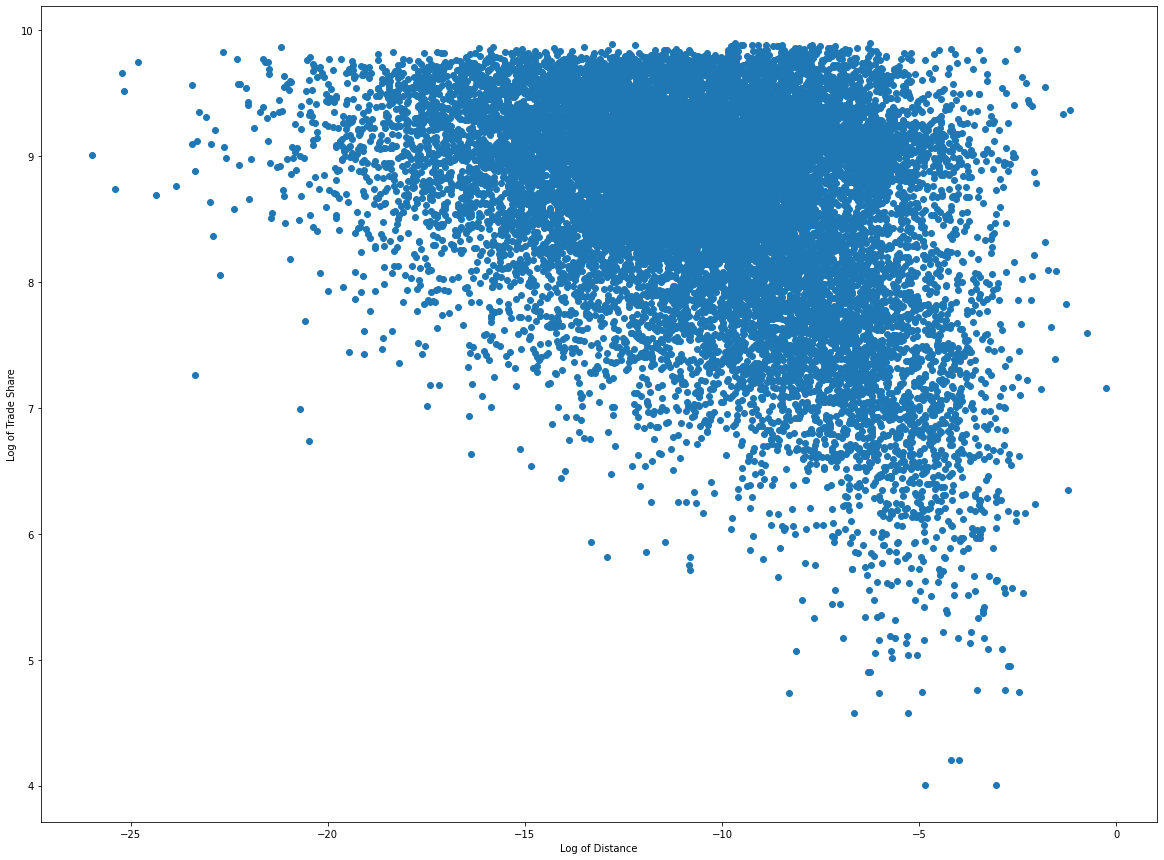

In [19]:
plt.figure(figsize = (20,15))
plt.xlabel('Log of Distance')
plt.ylabel('Log of Trade Share')
plt.scatter(np.log(df_final['trade_gdp']), np.log(df_final['distw_arithmetic']))

In [20]:
model_2 = smf.ols('np.log(trade_gdp)  ~ np.log(distw_arithmetic)', data = df_final).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(trade_gdp)   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2809.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:45:16   Log-Likelihood:                -48257.
No. Observations:               18530   AIC:                         9.652e+04
Df Residuals:                   18528   BIC:                         9.653e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.9237      0.253     11.534      0.000       2.427       3.421
np.log(distw_arithmetic)    -1.5483      0.029    -53.000      0.000      -1.606      -1.491
==============================================================================
Omnibus:                      400.185   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.188
Skew:                          -0.358   Prob(JB):                     1.05e-93
Kurtosis:                       3.203   Cond. No.                         92.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 4
Construct your country-level instrument, as described in Section I.D. of the paper:


### (a) For each country, construct the total amount of trade predicted by geographic determinants (equation (8) in the paper).


In [21]:
df_final['fit_exp'] = np.exp(model_1.fittedvalues)
df_final

,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,...,landlocked_o,continent_o,dis_int_o,area_d,landlocked_d,continent_d,dis_int_d,trade_gdp,LL,fit_exp
0,2019,ARE,ABW,ARE,ABW,1.049544e+04,NaN,4.172156e+08,3.310056e+06,12772.0,...,0,Asia,108.78900,193,0,America,5.225315,2.515593e-05,0,9.365655e-07
1,2019,ARG,ABW,ARG,ABW,4.954058e+03,NaN,4.528184e+08,3.310056e+06,5179.0,...,0,America,625.64750,193,0,America,5.225315,1.094050e-05,0,4.045297e-06
2,2019,AUT,ABW,AUT,ABW,8.227330e+02,NaN,4.450119e+08,3.310056e+06,8716.0,...,1,Europe,108.91960,193,0,America,5.225315,1.848789e-06,1,4.427589e-07
3,2019,AZE,ABW,AZE,ABW,6.972000e+01,NaN,4.817424e+07,3.310056e+06,11469.0,...,1,Asia,110.68600,193,0,America,5.225315,1.447247e-06,1,2.956112e-07
4,2019,BEL,ABW,BEL,ABW,2.907262e+03,NaN,5.353763e+08,3.310056e+06,7852.0,...,0,Europe,68.44467,193,0,America,5.225315,5.430316e-06,0,2.263588e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18525,2019,UKR,ZWE,UKR,ZWE,5.038700e+01,9.257326e+03,1.538830e+08,1.928429e+07,7443.0,...,0,Europe,292.23760,390759,1,Africa,235.119300,3.274371e-07,1,1.504633e-05
18526,2019,URY,ZWE,URY,ZWE,1.923380e+02,4.149910e+02,6.123115e+07,1.928429e+07,8561.0,...,0,America,157.89020,390759,1,Africa,235.119300,3.141179e-06,1,7.375118e-06
18527,2019,USA,ZWE,USA,ZWE,3.914599e+04,4.649868e+04,2.137257e+10,1.928429e+07,14105.0,...,0,America,1161.07400,390759,1,Africa,235.119300,1.831599e-06,1,6.945610e-06
18528,2019,ZAF,ZWE,ZAF,ZWE,1.977784e+06,1.852443e+06,3.879346e+08,1.928429e+07,1216.0,...,0,Africa,415.43020,390759,1,Africa,235.119300,5.098242e-03,1,1.657643e-03


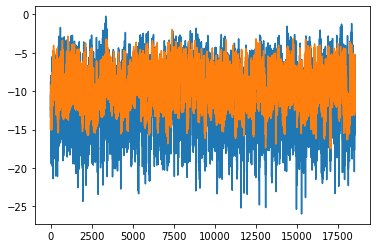

In [22]:
plt.plot(np.log(df_final['trade_gdp']))
plt.plot(model_1.fittedvalues)
plt.show()

In [23]:
grouped_fit = df_final.groupby('iso3_o')['fit_exp'].sum()
grouped_fit

iso3_o
ABW    0.007015
AFG    0.026196
AGO    0.026533
ALB    0.060664
ARE    0.050018
         ...   
VCT    0.008091
WSM    0.002123
ZAF    0.026938
ZMB    0.024817
ZWE    0.023102
Name: fit_exp, Length: 140, dtype: float64

In [24]:
grouped_tf = df_final.groupby('iso3_o')['trade_gdp'].sum()
grouped_tf

iso3_o
ABW    0.003337
AFG    0.029705
AGO    0.492502
ALB    0.140301
ARE    0.376821
         ...   
VCT    0.035972
WSM    0.039588
ZAF    0.187486
ZMB    0.258890
ZWE    0.129565
Name: trade_gdp, Length: 140, dtype: float64

### (b) Replicate Figure 1 in the paper, showing actual versus constructed trade.


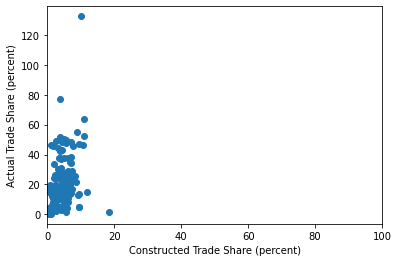

In [25]:
plt.scatter(grouped_fit*100, grouped_tf*100)
plt.xlim([0,100])
plt.xlabel('Constructed Trade Share (percent)')
plt.ylabel('Actual Trade Share (percent)')
plt.show()

In [26]:
np.corrcoef(grouped_fit*100, grouped_tf*100)

array([[1.        , 0.31559859],
       [0.31559859, 1.        ]])

### (c) Which countries are predicted to trade more? If you can, create maps to display your results.


In [56]:
grouped_fit.sort_values(ascending = False)

iso3_o
MAC    0.183039
JOR    0.118529
SVN    0.109369
SVK    0.108176
BEL    0.107176
         ...   
BMU    0.004125
FJI    0.004110
CPV    0.003083
PYF    0.002298
WSM    0.002123
Name: fit_exp, Length: 140, dtype: float64

In [28]:
grouped_tf.sort_values(ascending = False)

iso3_o
HKG    1.325919
SGP    0.774991
SVK    0.637039
LTU    0.552118
SVN    0.522794
         ...   
GRD    0.014430
GMB    0.013381
BMU    0.003507
ABW    0.003337
STP    0.002155
Name: trade_gdp, Length: 140, dtype: float64

# Question 5

In [29]:
# Group the DataFrame by 'country'
grouped = df_final.groupby('iso3_o')

# Calculate the mean population and area for each country
mean_values = grouped.mean()

In [30]:
df2 = pd.DataFrame(grouped)
df2 = df2.drop(df2.columns[1], axis =1)
df2

,0
0,ABW
1,AFG
2,AGO
3,ALB
4,ARE
...,...
135,VCT
136,WSM
137,ZAF
138,ZMB


In [31]:
grouped['gdp_o'].mean()

iso3_o
ABW    3.310056e+06
AFG    1.879945e+07
AGO    6.930910e+07
ALB    1.540183e+07
ARE    4.172156e+08
           ...     
VCT    9.101497e+05
WSM    8.520071e+05
ZAF    3.879346e+08
ZMB    2.330867e+07
ZWE    1.928429e+07
Name: gdp_o, Length: 140, dtype: float64

In [32]:
df_final.groupby('iso3_o')['gdp_o'].mean()

iso3_o
ABW    3.310056e+06
AFG    1.879945e+07
AGO    6.930910e+07
ALB    1.540183e+07
ARE    4.172156e+08
           ...     
VCT    9.101497e+05
WSM    8.520071e+05
ZAF    3.879346e+08
ZMB    2.330867e+07
ZWE    1.928429e+07
Name: gdp_o, Length: 140, dtype: float64

In [33]:
df3 = df_final.groupby('iso3_o')[['gdpcap_o','pop_o','area_o']].mean()
df3['grouped_fit'] = grouped_fit
df3['grouped_tf'] = grouped_tf
df3

,gdpcap_o,pop_o,area_o,grouped_fit,grouped_tf
iso3_o,,,,,
ABW,31.136000,106.3100,193.0,0.007015,0.003337
AFG,0.494000,38041.7580,652225.0,0.026196,0.029705
AGO,2.178000,31825.2990,1246700.0,0.026533,0.492502
ALB,5.396000,2854.1909,28748.0,0.060664,0.140301
ARE,42.701000,9770.5264,83657.0,0.050018,0.376821
...,...,...,...,...,...
VCT,8.229999,110.5930,389.0,0.008091,0.035972
WSM,4.323000,197.0930,2842.0,0.002123,0.039588
ZAF,6.625000,58558.2660,1219912.0,0.026938,0.187486


In [61]:
# OLS regression
model_3 = smf.ols('np.log(gdpcap_o)  ~ grouped_tf + np.log(pop_o) + np.log(area_o)', data = df3).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(gdpcap_o)   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     8.184
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           4.77e-05
Time:                        01:09:08   Log-Likelihood:                -237.38
No. Observations:                 140   AIC:                             482.8
Df Residuals:                     136   BIC:                             494.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.1853      0.566      5.

Our model is able to explain 15.3% changes of log gdpcap_o. For each variables, both grouped_tf and area_o are significant while population may not be a powerful explainer for gdpcap

In [35]:
# IV regression
model_4 = smf.ols('np.log(gdpcap_o)  ~ grouped_fit + np.log(pop_o) + np.log(area_o)', data = df3).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(gdpcap_o)   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     5.670
Date:                Tue, 25 Apr 2023   Prob (F-statistic):            0.00109
Time:                        00:45:16   Log-Likelihood:                -240.75
No. Observations:                 140   AIC:                             489.5
Df Residuals:                     136   BIC:                             501.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.2805      0.582      5.

The above is already the second stage of IV regression as which grouped_fit is the value we got from previous OLS regression

In [60]:
# IV regression
iv_model = IV2SLS.from_formula('np.log(gdpcap_o) ~ 1 + np.log(pop_o) + np.log(area_o) + [grouped_tf ~ grouped_fit]',data=df3).fit()
print(iv_model)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       np.log(gdpcap_o)   R-squared:                      0.0068
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0151
No. Observations:                 140   F-statistic:                    10.085
Date:                Tue, Apr 25 2023   P-value (F-stat)                0.0179
Time:                        01:08:14   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept          2.6234     0.6678     3.9284     0.0001      1.3146      3.9323
np.log(area_o)    -0.1173     0.1024

For the direct IV model, we arrived at a very low R-square in explaining log gdpcap_o. For each variables, grouped_ft is significant while neither area nor population serves as an powerful explainer

## 6. Assess the robustness of your results. In particular, include additional explanatory variables that you think may affect the income level independently of trade. Is the impact of trade substantially different with these controls?


We include additional explanatory variables: continent dummies and dis_int.

In [37]:
geo_o

,iso3_o,area_o,landlocked_o,continent_o,dis_int_o
0,ABW,193,0,America,5.225315
1,AFG,652225,1,Asia,303.761400
2,AGO,1246700,0,Africa,419.966600
3,AIA,102,0,America,3.798690
4,ALB,28748,0,Europe,63.773110
...,...,...,...,...,...
220,YUG,102173,0,Europe,120.227000
221,ZAF,1219912,0,Africa,415.430200
222,ZAR,2345410,0,Africa,576.027500
223,ZMB,752614,1,Africa,326.302200


In [38]:
geo_o = geo_o.set_index('iso3_o')

In [39]:
# Merge continent and dis_int_o information
df3 = df3.merge(geo_o[['continent_o', 'dis_int_o']], left_index=True, right_index=True)

In [40]:
# Create continent dummies
continent_dummies = pd.get_dummies(df3['continent_o'], prefix='continent')
df3 = pd.concat([df3, continent_dummies], axis=1)

In [41]:
# Filter out outliers based on actual and constructed trade shares
# Calculate the IQR for grouped_tf and grouped_fit
Q1_tf = df3['grouped_tf'].quantile(0.1)
Q3_tf = df3['grouped_tf'].quantile(0.9)
IQR_tf = Q3_tf - Q1_tf

Q1_fit = df3['grouped_fit'].quantile(0.1)
Q3_fit = df3['grouped_fit'].quantile(0.9)
IQR_fit = Q3_fit - Q1_fit

# Define the lower and upper bounds for outliers
lower_bound_tf = Q1_tf - 1.96 * IQR_tf
upper_bound_tf = Q3_tf + 1.96 * IQR_tf

lower_bound_fit = Q1_fit - 1.96 * IQR_fit
upper_bound_fit = Q3_fit + 1.96 * IQR_fit

# Filter out outliers based on the IQR method
df_filtered = df3[(df3['grouped_tf'] >= lower_bound_tf) & (df3['grouped_tf'] <= upper_bound_tf) & (df3['grouped_fit'] >= lower_bound_fit) & (df3['grouped_fit'] <= upper_bound_fit)]

In [42]:
df_filtered

,gdpcap_o,pop_o,area_o,grouped_fit,grouped_tf,continent_o,dis_int_o,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Pacific
iso3_o,,,,,,,,,,,,
ABW,31.136000,106.3100,193.0,0.007015,0.003337,America,5.225315,0,1,0,0,0
AFG,0.494000,38041.7580,652225.0,0.026196,0.029705,Asia,303.761400,0,0,1,0,0
AGO,2.178000,31825.2990,1246700.0,0.026533,0.492502,Africa,419.966600,1,0,0,0,0
ALB,5.396000,2854.1909,28748.0,0.060664,0.140301,Europe,63.773110,0,0,0,1,0
ARE,42.701000,9770.5264,83657.0,0.050018,0.376821,Asia,108.789000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
VCT,8.229999,110.5930,389.0,0.008091,0.035972,America,7.418372,0,1,0,0,0
WSM,4.323000,197.0930,2842.0,0.002123,0.039588,Pacific,20.051450,0,0,0,0,1
ZAF,6.625000,58558.2660,1219912.0,0.026938,0.187486,Africa,415.430200,1,0,0,0,0


In [43]:
# OLS regression with continent dummies and dis_int_o
model_5 = smf.ols('np.log(gdpcap_o) ~ grouped_tf + np.log(pop_o) + np.log(area_o) + dis_int_o + continent_Africa + continent_America + continent_Asia + continent_Europe', data=df_filtered).fit()
print("OLS regression with continent dummies and dis_int_o:\n", model_5.summary())

OLS regression with continent dummies and dis_int_o:
                             OLS Regression Results                            
Dep. Variable:       np.log(gdpcap_o)   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     23.96
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.89e-22
Time:                        00:45:16   Log-Likelihood:                -183.92
No. Observations:                 139   AIC:                             385.8
Df Residuals:                     130   BIC:                             412.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [44]:
# IV regression with continent dummies and dis_int_o
iv_model_2 = IV2SLS.from_formula('np.log(gdpcap_o) ~ 1 + np.log(pop_o) + np.log(area_o) + dis_int_o + continent_Africa + continent_America + continent_Asia + continent_Europe + [grouped_tf ~ grouped_fit]', data=df_filtered).fit()
print("\nIV regression with continent dummies and dis_int_o:\n", iv_model_2)


IV regression with continent dummies and dis_int_o:
                           IV-2SLS Estimation Summary                          
Dep. Variable:       np.log(gdpcap_o)   R-squared:                      0.2294
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1820
No. Observations:                 139   F-statistic:                    135.15
Date:                Tue, Apr 25 2023   P-value (F-stat)                0.0000
Time:                        00:45:16   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             5.0551     0.7271     6.9521     0

We compare the coefficients of 'grouped_tf' in both the original OLS and IV regressions and the new OLS and IV regressions with the additional control variables. If the coefficients remain relatively stable and maintain their significance, we can conclude that the impact of trade is robust to the inclusion of the additional control variables. We can see from the IV regression that the impact of trade is substantially different with these controls, and the coefficient of grouped_tf becomes insignificant.

# Question7

a) By how much would Bolivia’s income increase if it gained access to the sea? (Bolivia lost its coastline in an international dispute in the 19th century).

In [45]:
###select Bolivia dataframe
BOL = df_final[df_final['iso3_o']=='BOL']
BOL

,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,...,landlocked_o,continent_o,dis_int_o,area_d,landlocked_d,continent_d,dis_int_d,trade_gdp,LL,fit_exp
81,2019,BOL,AFG,BOL,AFG,1.677560e+02,NaN,40895322.85,1.879945e+07,15087.0,...,1,America,394.2302,652225,1,Asia,303.76140,4.102083e-06,2,0.000002
177,2019,BOL,AGO,BOL,AGO,2.249290e+02,154.386,40895322.85,6.930910e+07,8616.0,...,1,America,394.2302,1246700,0,Africa,419.96660,5.500116e-06,1,0.000013
337,2019,BOL,ALB,BOL,ALB,2.433000e+00,45.223,40895322.85,1.540183e+07,10916.0,...,1,America,394.2302,28748,0,Europe,63.77311,5.949336e-08,1,0.000002
502,2019,BOL,ARE,BOL,ARE,2.830086e+03,2441.551,40895322.85,4.172156e+08,13903.0,...,1,America,394.2302,83657,0,Asia,108.78900,6.920317e-05,1,0.000004
630,2019,BOL,ARG,BOL,ARG,1.376780e+06,1368970.500,40895322.85,4.528184e+08,1897.0,...,1,America,394.2302,2766889,0,America,625.64750,3.366595e-02,1,0.003589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17544,2019,BOL,URY,BOL,URY,1.646143e+04,18120.834,40895322.85,6.123115e+07,2187.0,...,1,America,394.2302,176215,0,America,157.89020,4.025260e-04,1,0.000022
17649,2019,BOL,USA,BOL,USA,4.039890e+05,407107.500,40895322.85,2.137257e+10,6815.0,...,1,America,394.2302,9529106,0,America,1161.07400,9.878611e-03,1,0.000113
17932,2019,BOL,VEN,BOL,VEN,7.047447e+03,NaN,40895322.85,NaN,3041.0,...,1,America,394.2302,911930,0,America,359.18200,1.723289e-04,1,0.000066
18233,2019,BOL,ZAF,BOL,ZAF,8.346950e+02,1102.401,40895322.85,3.879346e+08,9378.0,...,1,America,394.2302,1219912,0,Africa,415.43020,2.041053e-05,1,0.000021


In [46]:
## Change the value of landlocked variable
BOL['LL'] = BOL['LL']-1
BOL

/var/folders/50/7cl_zk114f168ksv_ymjwzm00000gn/T/ipykernel_48329/1173935333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOL['LL'] = BOL['LL']-1


,year,country_id_o,country_id_d,iso3_o,iso3_d,tradeflow_comtrade_o,tradeflow_comtrade_d,gdp_o,gdp_d,distw_arithmetic,...,landlocked_o,continent_o,dis_int_o,area_d,landlocked_d,continent_d,dis_int_d,trade_gdp,LL,fit_exp
81,2019,BOL,AFG,BOL,AFG,1.677560e+02,NaN,40895322.85,1.879945e+07,15087.0,...,1,America,394.2302,652225,1,Asia,303.76140,4.102083e-06,1,0.000002
177,2019,BOL,AGO,BOL,AGO,2.249290e+02,154.386,40895322.85,6.930910e+07,8616.0,...,1,America,394.2302,1246700,0,Africa,419.96660,5.500116e-06,0,0.000013
337,2019,BOL,ALB,BOL,ALB,2.433000e+00,45.223,40895322.85,1.540183e+07,10916.0,...,1,America,394.2302,28748,0,Europe,63.77311,5.949336e-08,0,0.000002
502,2019,BOL,ARE,BOL,ARE,2.830086e+03,2441.551,40895322.85,4.172156e+08,13903.0,...,1,America,394.2302,83657,0,Asia,108.78900,6.920317e-05,0,0.000004
630,2019,BOL,ARG,BOL,ARG,1.376780e+06,1368970.500,40895322.85,4.528184e+08,1897.0,...,1,America,394.2302,2766889,0,America,625.64750,3.366595e-02,0,0.003589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17544,2019,BOL,URY,BOL,URY,1.646143e+04,18120.834,40895322.85,6.123115e+07,2187.0,...,1,America,394.2302,176215,0,America,157.89020,4.025260e-04,0,0.000022
17649,2019,BOL,USA,BOL,USA,4.039890e+05,407107.500,40895322.85,2.137257e+10,6815.0,...,1,America,394.2302,9529106,0,America,1161.07400,9.878611e-03,0,0.000113
17932,2019,BOL,VEN,BOL,VEN,7.047447e+03,NaN,40895322.85,NaN,3041.0,...,1,America,394.2302,911930,0,America,359.18200,1.723289e-04,0,0.000066
18233,2019,BOL,ZAF,BOL,ZAF,8.346950e+02,1102.401,40895322.85,3.879346e+08,9378.0,...,1,America,394.2302,1219912,0,Africa,415.43020,2.041053e-05,0,0.000021


In [47]:
### get a new constructed trade share for Bolivia
new_fit_exp = np.exp(model_1.predict(BOL))
new_share = new_fit_exp.sum()
new_share

0.03151468635943483

In [48]:
### change a value of Bolivia trade share
new_BOL = df3[df3.index == 'BOL']
new_BOL['grouped_fit'] = new_share
new_BOL

/var/folders/50/7cl_zk114f168ksv_ymjwzm00000gn/T/ipykernel_48329/1255401416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_BOL['grouped_fit'] = new_share


,gdpcap_o,pop_o,area_o,grouped_fit,grouped_tf,continent_o,dis_int_o,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Pacific
iso3_o,,,,,,,,,,,,
BOL,3.552,11513.102,1098581.0,0.031515,0.174346,America,394.2302,0,1,0,0,0


In [49]:
### Previous Bolivia's income from second stage regression
df3['fittedvalues'] = np.exp(model_4.fittedvalues)
df3[df3.index == 'BOL']

,gdpcap_o,pop_o,area_o,grouped_fit,grouped_tf,continent_o,dis_int_o,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Pacific,fittedvalues
iso3_o,,,,,,,,,,,,,
BOL,3.552,11513.102,1098581.0,0.0199,0.174346,America,394.2302,0,1,0,0,0,4.510125


In [50]:
### New Bolivia's income from second stage regression
np.exp(model_4.predict(new_BOL))

iso3_o
BOL    5.17915
dtype: float64

In [51]:
# percentage of change
pct_change = 5.17915 / 4.510125 - 1
print("pct_change is",pct_change)

pct_change is 0.14833846068567924


# B)

b) Consider the two measures of success shown in Table 1 of Caselli: “Accounting for Cross Country Income Differences”. These measures are the fraction of the dispersion in income per capita (in terms of variance of log income) accounted for by human and physical capital. Using your estimated IV coefficient, compute the fraction of the dispersion in income per capita accounted for by variation in the trade shares. For this step, use the IV-predicted trade shares.

$$ success_1 = \frac{var[log(y_{KH})]}{var[log(y)]} $$
$$ success_2 = \frac{y^{90}_{KH} / y^{10}_{KH}}{y^{90} / y^{10}}$$

In [64]:
#### success 1
(df3['grouped_fit']*11.9083).var()/(np.log(df3['gdpcap_o'])).var()

0.05418595422804586

In [65]:
### success 2 
percentile90_trade_share = (df3['grouped_fit']*11.9083).quantile(0.9)
percentile10_trade_share = (df3['grouped_fit']*11.9083).quantile(0.1)

percentile90_income_capita = df3['gdpcap_o'].quantile(0.9)
percentile10_income_capita = df3['gdpcap_o'].quantile(0.1)

print("percentile90_trade_share",percentile90_trade_share)
print("percentile10_trade_share",percentile10_trade_share)
print("percentile90_income_capita",percentile90_income_capita)
print("percentile10_income_capita",percentile10_income_capita)
print('Success 2 is',(percentile90_trade_share/percentile10_trade_share)/(percentile90_income_capita/percentile10_income_capita))

percentile90_trade_share 0.9252942445426281
percentile10_trade_share 0.14975439963583004
percentile90_income_capita 50.296498100000015
percentile10_income_capita 1.1431
Success 2 is 0.14042574831423707


# C)

In [68]:
# calculate the new predicted trade shares by subtracting the reduced effect of distance
df_final['fit_exp1'] = np.exp(model_1.fittedvalues) -  0.1 * (-1.5658 * np.log(df_final['distw_arithmetic']))
grouped_fit = df_final.groupby('iso3_o')['fit_exp1'].sum()
print("grouped_fit",grouped_fit)

grouped_fit iso3_o
ABW     10.116946
AFG     74.126926
AGO    165.840491
ALB    148.906657
ARE    250.600835
          ...    
VCT     47.285026
WSM     54.313874
ZAF    261.582456
ZMB    144.176180
ZWE    105.537046
Name: fit_exp1, Length: 140, dtype: float64


In [69]:
df3['grouped_fit'] = grouped_fit
df3

,gdpcap_o,pop_o,area_o,grouped_fit,grouped_tf,continent_o,dis_int_o,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Pacific,fittedvalues
iso3_o,,,,,,,,,,,,,
ABW,31.136000,106.3100,193.0,10.116946,0.003337,America,5.225315,0,1,0,0,0,11.945683
AFG,0.494000,38041.7580,652225.0,74.126926,0.029705,Asia,303.761400,0,0,1,0,0,4.430485
AGO,2.178000,31825.2990,1246700.0,165.840491,0.492502,Africa,419.966600,1,0,0,0,0,4.330384
ALB,5.396000,2854.1909,28748.0,148.906657,0.140301,Europe,63.773110,0,0,0,1,0,11.064977
ARE,42.701000,9770.5264,83657.0,250.600835,0.376821,Asia,108.789000,0,0,1,0,0,7.899624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCT,8.229999,110.5930,389.0,47.285026,0.035972,America,7.418372,0,1,0,0,0,11.459413
WSM,4.323000,197.0930,2842.0,54.313874,0.039588,Pacific,20.051450,0,0,0,0,1,8.695394
ZAF,6.625000,58558.2660,1219912.0,261.582456,0.187486,Africa,415.430200,1,0,0,0,0,4.078329


In [70]:
# old_inequality value
old_inequality = np.sqrt(df3['gdpcap_o'].var())
old_inequality

23.461082677163734

In [74]:
# predict using the iv model
predicted_income = iv_model.predict()
print(predicted_income)

        fitted_values
iso3_o               
ABW          1.807042
AFG          0.723822
AGO          3.178369
ALB          1.813351
ARE          2.919820
...               ...
VCT          1.900825
WSM          1.660315
ZAF          1.490201
ZMB          1.991266
ZWE          1.372577

[140 rows x 1 columns]


In [75]:
#new_inequality value
new_inequality = predicted_income.var()
new_inequality

fitted_values    1.090267
dtype: float64

In [76]:
# how much did world income inequality change
pct_change_inequality = new_inequality / old_inequality - 1
print("pct_change_inequality",pct_change_inequality)

pct_change_inequality fitted_values   -0.953529
dtype: float64
